# Studies of data reuse: Whole cell patch-clamp recordings of cerebellar granule cells

In this notebook we will look more closely at the EBRAINS dataset "[Whole cell patch-clamp recordings of cerebellar granule cells](https://doi.org/10.25493/CHJG-7QC)", contributed by Marialuisa Tognolina from the laboratory of Egidio D'Angelo at the University of Pavia.

As we can see from the dataset description,

<i>This dataset provides a characterization of the intrinsic excitability and synaptic properties of the cerebellar granule cells. Whole-cell patch-clamp recordings were performed on acute parasagittal cerebellar slices obtained from juvenile Wistar rats (p18-p24). Passive granule cells parameters were extracted in voltage-clamp mode by analyzing current relaxation induced by step voltage changes (IV protocol). Granule cells intrinsic excitability was investigated in current-clamp mode by injecting 2 s current steps (CC step protocol). Synaptic transmission properties were investigated in current clamp mode by an electrical stimulation of the mossy fibers bundle (5 pulses at 50 Hz, EPSP protocol).</i>

More information is available in the [Data Descriptor](https://object.cscs.ch/v1/AUTH_63ea6845b1d34ad7a43c8158d9572867/hbp-d000017_PatchClamp-GranuleCells_pub/HBP-DataDescriptor_PatchGrCs.txt).

This dataset forms part of the results reported in Masoli, S., Tognolina, M., Laforenza, U. *et al.* (2020) Parameter tuning differentiates granule cell subtypes enriching transmission properties at the cerebellum input stage. *Commun Biol* **3**:222. https://doi.org/10.1038/s42003-020-0953-x

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

In [5]:
# import quantities as pq
# from scipy.stats import linregress
# from neo import get_io
# import numpy as np
# import matplotlib.pyplot as plt
# from elephant import spike_train_generation
# from neo.core import SpikeTrain
# import matplotlib.patches as patches
# from matplotlib.patches import Rectangle
# from scipy.interpolate import make_interp_spline
# from elephant import statistics
# from fairgraph.client_v3 import KGv3Client as KGClient
# from fairgraph.openminds.core import DatasetVersion, File, FileBundle

## Access data and metadata

Information about the dataset, including how to download it, is stored in the EBRAINS Knowledge Graph. You can view this information in your web browser at [this link](https://doi.org/10.25493/CHJG-7QC), but here we'll use a Python client called fairgraph to access the information.

In [1]:
from fairgraph import KGClient
from fairgraph.openminds.core import DatasetVersion

kg_client = KGClient(host="core.kg.ebrains.eu")

In [2]:
dataset = DatasetVersion.list(kg_client, name="Whole cell patch-clamp recordings of cerebellar granule cells")[0]

In [3]:
# todo: improve the "show" method to specify which fields we include, and to add a follow_links option

id                         https://kg.ebrains.eu/api/instances/7dc5d5d5-4323-41d6-bdfd-0b841cfe7000
space                      dataset
name                       Whole cell patch-clamp recordings of cerebellar granule cells
alias                      Whole cell patch-clamp recordings of cerebellar granule cells
accessibility              KGProxy([<class 'fairgraph.openminds.controlledterms.product_accessibility.ProductAccessibility'>], 'https://kg.ebrains.eu/api/instances/b2ff7a47-b349-48d7-8ce4-cf51868675f1')
authors                    None
behavioral_protocols       None
copyright                  None
custodians                 None
data_types                 KGProxy([<class 'fairgraph.openminds.controlledterms.semantic_data_type.SemanticDataType'>], 'https://kg.ebrains.eu/api/instances/f468ee45-37a6-4e71-8b70-0cbe66d367db')
description
digital_identifier         KGProxy([<class 'fairgraph.openminds.core.miscellaneous.doi.DOI'>], 'https://kg.ebrains.eu/api/instances/ee7e4276-beb7-4e

In [11]:
file_repository = dataset.repository.resolve(kg_client, scope="in progress")

In [12]:
str(file_repository.iri)

'https://object.cscs.ch/v1/AUTH_63ea6845b1d34ad7a43c8158d9572867/hbp-d000017_PatchClamp-GranuleCells_pub'

In [13]:
file_repository.id

'https://kg.ebrains.eu/api/instances/71b4ce6b-8a46-49ee-8a5a-3e445db96606'

In [14]:
dataset.input_data

In [24]:
FileBundle.list(kg_client, is_part_of=file_repository, scope="in progress")

[]

In [15]:
File.list(kg_client, file_repository=file_repository, scope="in progress", space="files")

[]

In [27]:
File.default_space

'files'

In [28]:
DatasetVersion.default_space

'dataset'

In [17]:
File.generate_query("simple", "foospace", kg_client, resolved=False)

{'@context': {'@vocab': 'https://core.kg.ebrains.eu/vocab/query/',
  'query': 'https://schema.hbp.eu/myQuery/',
  'propertyName': {'@id': 'propertyName', '@type': '@id'},
  'merge': {'@type': '@id', '@id': 'merge'},
  'path': {'@id': 'path', '@type': '@id'}},
 'meta': {'type': 'https://openminds.ebrains.eu/core/File',
  'name': 'fg-File-simple-foospace',
  'description': 'Automatically generated by fairgraph'},
 'structure': [{'path': '@id', 'filter': {'op': 'equals', 'parameter': 'id'}},
  {'path': 'https://core.kg.ebrains.eu/vocab/meta/space',
   'filter': {'op': 'EQUALS', 'value': 'foospace'},
   'propertyName': 'query:space'},
  {'path': '@type'},
  {'propertyName': 'vocab:content',
   'path': 'https://openminds.ebrains.eu/vocab/content',
   'filter': {'op': 'CONTAINS', 'parameter': 'content'}},
  {'propertyName': 'vocab:fileRepository',
   'path': 'https://openminds.ebrains.eu/vocab/fileRepository',
   'structure': [{'path': '@id'}, {'path': '@type'}],
   'filter': {'op': 'CONTAIN

In [32]:
q = File.retrieve_query("simple", "files", kg_client)

In [33]:
q

{'@id': 'https://kg.ebrains.eu/api/instances/311cf8f5-ce84-4927-a5e6-d21611f28b4a',
 '@type': ['https://core.kg.ebrains.eu/vocab/meta/type/Query'],
 'http://schema.org/identifier': ['https://kg.ebrains.eu/api/instances/311cf8f5-ce84-4927-a5e6-d21611f28b4a'],
 'https://core.kg.ebrains.eu/vocab/meta/revision': '_c8lze0e---',
 'https://core.kg.ebrains.eu/vocab/meta/space': 'files',
 'https://core.kg.ebrains.eu/vocab/meta/user': [{'@id': 'https://kg.ebrains.eu/api/instances/c5487c5b-b5d6-41b1-b506-773a04a74d03'}],
 'https://core.kg.ebrains.eu/vocab/query/meta': {'https://core.kg.ebrains.eu/vocab/query/type': 'https://openminds.ebrains.eu/core/File',
  'https://core.kg.ebrains.eu/vocab/query/name': 'fg-File-simple-files',
  'https://core.kg.ebrains.eu/vocab/query/description': 'Automatically generated by fairgraph'},
 'https://core.kg.ebrains.eu/vocab/query/structure': [{'https://core.kg.ebrains.eu/vocab/query/path': {'@id': '@id'},
   'https://core.kg.ebrains.eu/vocab/query/filter': {'http

## Different electroresponsive properties in cerebellar GrCs:

### **Table of Contents**

1. [Data extraction](#data_extraction)  
    1.1 [Extraction of time and membrane potential variables at 10pA](#1.1)  
    1.2 [Extraction of initial and final frequencies for each segment:](#1.2)  
    1.3 [Calculation of IFCs:](#1.3)  
2. [Figure1.a](#fig1a)
3. [Figure1.c](#fig1c)
4. [Figure1.d](#fig1d)

### **Data extraction:** <a class="anchor" id="data_extraction"></a>

We used the Neo library (https://neo.readthedocs.io/en/stable/#) to extract the electrophysiological properties.

For this part of the paper, the authors indicate they have performed a Current Clamp step protocol:   

- The files to be used are the "CC step.abf" files.
- The files used in this paper were found by comparing each voltage value with the value in the file "42003_2020_953_MOESM2_ESM.xlsx".
- Each file consists of an average of 16 segments corresponding to current injection steps from -8 to 22pA in 2pA increments.

In [2]:
adapting = "hbp-d000017_PatchClamp-GranuleCells_pub/GrC_Subject15_180116/180116_0005 CC step.abf"
non_adapting="hbp-d000017_PatchClamp-GranuleCells_pub/GrC_Subject06_090216/090216_0003 CC step.abf"
accelerating="hbp-d000017_PatchClamp-GranuleCells_pub/GrC_Subject10_111018/111018_0001 CC step.abf"
listFile=[adapting,non_adapting,accelerating]

We have stored values in matrices (listTime, listVolt,freqI,freqF, listIFC) where each index represents a cell:

- index_adapting=0
- index_nonadapting=1
- index_accelerating=2

#### **Extraction of time and membrane potential variables at 10pA:** <a class="anchor" id="1.1"></a>

In [16]:
listTime=[]
listVolt=[]

for file_path in listFile:
    data = {}
    data[file_path] = get_io(file_path).read(lazy=True)[0]
    ch = data[file_path].segments[9].filter(channel_id=0)[0].load() #index_10pA = 9
    time= ch.times.magnitude*1000 #convert to ms
    time=list(time-time[0])
    volt=list(ch.magnitude.flatten())

    listTime.append(time)
    listVolt.append(volt)

the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


#### **Extraction of initial and final frequencies for each segment:** <a class="anchor" id="1.2"></a>

The graph **1a** in the paper show that the cellular response occurs at 100ms after the current injection.  

The authors state that finitial and ffinal are the spike frequencies at the beginning and end of current injection

The authors state they use a time window of 500 ms:
- To extract the frequencies we use the elephant library (https://elephant.readthedocs.io/en/latest/index.html)
- We correct the time window by adding 100 ms

| time windows  |    t_initial    |   t_final     |
| ------------- |: -------------: | ------------: |
| t0-t500       |  t_start+100ms  | t_start+600ms |
| t1500-t2000   |  t_start+1600ms | t_start+2100ms|

In [18]:
freqI=[]
freqF=[]
for file_path in listFile:
    l1=[]
    l2=[]
    data = get_io(file_path).read()
    for y, segment in enumerate(data[0].segments):
        seg=data[0].segments[y].analogsignals[0]
        time= seg.times
        spike_times=spike_train_generation.spike_extraction(seg)
        
        if y >=8 and y<=14: #Only segments from 8 to 20pA are selected.
            train = SpikeTrain(spike_times, t_stop=time[-1], units='s')
            rateI = float(statistics.mean_firing_rate(train,t_start=time[0]+100*pq.ms,t_stop=time[0]+600*pq.ms).magnitude)
            rateF = float(statistics.mean_firing_rate(train,t_start=time[0]+1600*pq.ms,t_stop=time[0]+2100*pq.ms).magnitude)
            l1.append(rateI)
            l2.append(rateF)
    freqI.append(l1)
    freqF.append(l2)

the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release
the default signal_group_mode will change from 'split-all' to 'group-by-same-units' in next release


#### **Calculation of IFCs:** <a class="anchor" id="1.3"></a>

$$IFC = [(f_{final} – f_{initial})/f_{initial}]%$$

In [51]:
listIFC=[]
for i in range(len(freqI)):
    l=[]
    for y in range(len(freqI[i])):
        a=(freqF[i][y]-freqI[i][y])
        b=freqI[i][y]
        
        ifc=(a/b)*100
        l.append(ifc)
    listIFC.append(l)

### **Fig1.a: Voltage responses to 2000 ms–10 pA current injection from the holding potential of –65 mV** <a class="anchor" id="fig1a"></a>

*Graphic settings for all figures:*

In [58]:
plt.rcParams["figure.figsize"] = (10, 10)
listCurrent= list(np.arange(8,22,2))
map_color=["blue","green","orange"]
legend=["Adapting","Non_Adapting","Accelerating"]

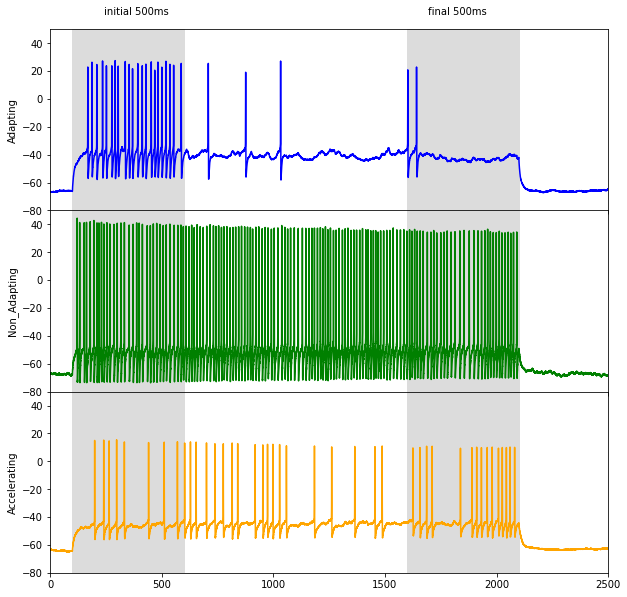

In [59]:
fig=plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i in range(len(listVolt)):
    voltage=listVolt[i]
    time=listTime[i]
    
    axs[i].plot(time,voltage,color=map_color[i])
    axs[i].set_ylabel(legend[i])

    r1=axs[i].add_patch(patches.Rectangle((100, -80), 500,130,fill=True, color='gainsboro'))
    r2=axs[i].add_patch(patches.Rectangle((1600,-80),500,130,fill=True, color='gainsboro'))

fig.text(0.2, 0.9, r'initial 500ms')
fig.text(0.65, 0.9, r'final 500ms') 
plt.xlim(0, 2500)
plt.ylim(-80,50)
plt.show()

### **Fig1.c: Plot of initial frequencies vs. injected current for the three GrCs** <a class="anchor" id="fig1c"></a>

$$R^2 = 0.90, p = 0.0007$$

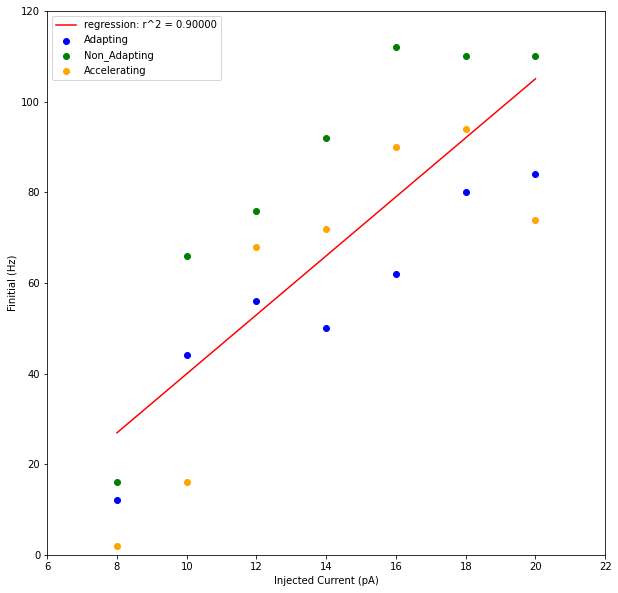

In [64]:
for i in range(len(freqI)):
    plt.scatter(listCurrent, freqI[i], label=legend[i], color=map_color[i])

(a0,b0,r0,_0,_0)= linregress(listCurrent, freqI[0])
(a1,b1,r1,_1,_1)= linregress(listCurrent, freqI[1])
(a2,b2,r2,_2,_2)= linregress(listCurrent, freqI[2])

a=(a0+a1+a2)/3
b=(b0+b1+b2)/3
r=round((r0+r1+r2)/3,2)

plt.plot([listCurrent[0], listCurrent[-1]],[a * listCurrent[0] + b, a * listCurrent[-1] + b], "r-",label="regression: r^2 ={:8.5f}".format(r))

plt.xlabel('Injected Current (pA)')
plt.ylabel('Finitial (Hz)')
plt.ylim(0,120)
plt.xlim(6,22)
plt.legend()
plt.show()

### **Fig1.d: Plot of the intrinsic frequency change IFC vs. injected current for the three GrCs** <a class="anchor" id="fig1d"></a>

$$Adapting : IFC_{10pA} <0$$

$$NonAdapting : IFC_{10pA} =0$$

$$Accelerating : IFC_{10pA} >0$$

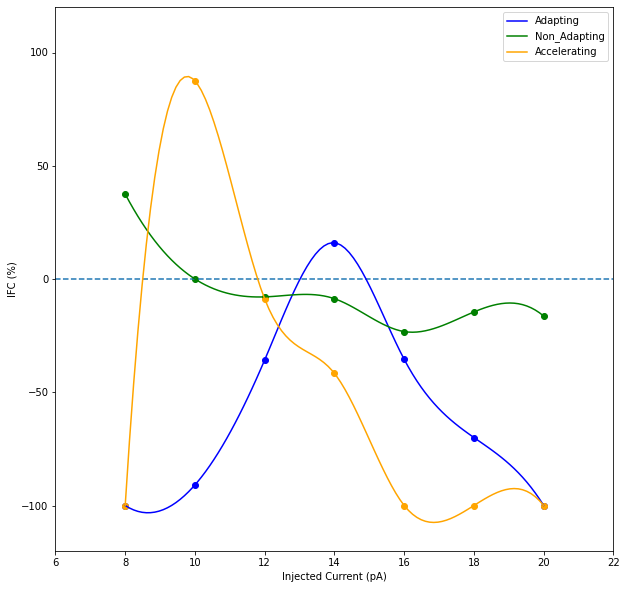

In [61]:
for i in range(len(listeIFC)):
    model=make_interp_spline(listCurrent,listIFC[i])
    xs=np.linspace(8,20,100) #smoothing of the line
    ys=model(xs)

    plt.plot(xs, ys, color=map_color[i], label=legend[i])
    plt.scatter(listCurrent,listIFC[i], color=map_color[i])

plt.hlines(y=0, xmin=6, xmax=22,linestyle='--')    
plt.xlabel('Injected Current (pA)')
plt.ylabel('IFC (%)')
plt.xlim(6,22)
plt.ylim(-120,120)
plt.legend()
plt.show()